In [656]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
warnings.filterwarnings('ignore')

In [657]:
df = pd.read_csv('C:\\Users\\sunde\\Downloads\\Real_Estate\\Bangalore_Data.csv')

In [658]:
df.shape

(13320, 9)

In [659]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [660]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [661]:
df1 = df.drop(['area_type' ,'society', 'balcony' , 'availability'] , axis='columns')

In [662]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [663]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [664]:
df1.shape

(13320, 5)

In [665]:
df2 = df1.dropna().reset_index(drop=True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [666]:
df2.shape

(13246, 5)

In [667]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [668]:
df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [669]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [670]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [671]:
df2[df2.BHK>20]

,location,size,total_sqft,bath,price,BHK
1705,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4654,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [672]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [673]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [674]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
120,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
135,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
163,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
186,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
406,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
545,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
642,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
655,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
665,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [675]:
def convert_to_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [676]:
convert_to_float('1120 - 1145')

1132.5

In [677]:
convert_to_float('2166')

2166.0

In [678]:
convert_to_float('34.46Sq. Meter')

In [679]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_to_float)
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [680]:
df3.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [681]:
df3.iloc[406]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
BHK                 1
Name: 406, dtype: object

In [682]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [683]:
df3.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [684]:
df3.shape

(13246, 6)

In [685]:
df4 = df3.dropna().reset_index(drop=True)
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [686]:
df4.shape

(13200, 6)

In [687]:
df4['price_per_sqft'] = df4['price']*100000 / df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [688]:
len(df4['location'].unique())

1298

In [689]:
df4.location = df4.location.apply(lambda x:x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                         533
Sarjapur  Road                     392
Electronic City                    304
Kanakpura Road                     264
Thanisandra                        235
                                  ... 
beml layout, basaveshwara nagar      1
basaveshwarnagar                     1
1 Giri Nagar                         1
4 Bedroom Farm House in Bagalur      1
3rd Stage Raja Rajeshwari Nagar      1
Name: location, Length: 1287, dtype: int64

In [690]:
len(location_stats[location_stats<=10])

1047

In [691]:
location_stats_9 = location_stats[location_stats==9]
len(location_stats_9)

20

In [692]:
location_stats_less_than_9 = location_stats[location_stats<=9]
location_stats_less_than_9

location
Vignana Nagar                      9
Kamakshipalya                      9
KUDLU MAIN ROAD                    9
Ejipura                            9
2nd Phase JP Nagar                 9
                                  ..
beml layout, basaveshwara nagar    1
basaveshwarnagar                   1
1 Giri Nagar                       1
4 Bedroom Farm House in Bagalur    1
3rd Stage Raja Rajeshwari Nagar    1
Name: location, Length: 1033, dtype: int64

<Axes: xlabel='location', ylabel='Count'>

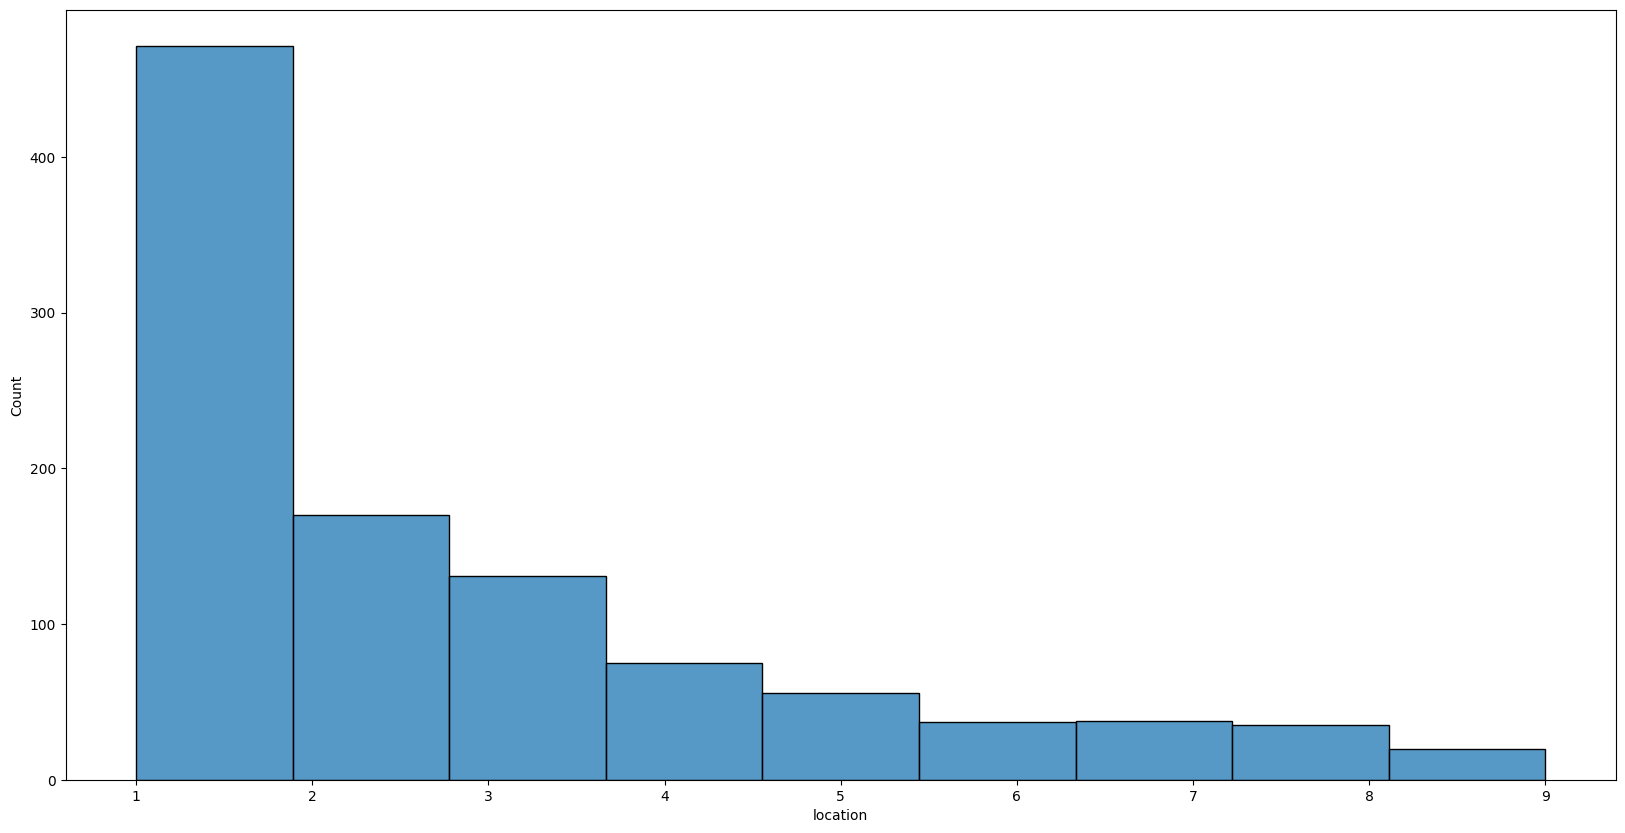

In [693]:
import seaborn as sns
location_count_less_than_9 = location_stats[location_stats<=9]
sns.histplot(location_count_less_than_9, bins = 9)

In [694]:
df4.location = df4.location.apply(lambda x:'other' if x in location_stats_less_than_9 else x)
len(df4.location.unique())

255

In [695]:
df4.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [696]:
df4[df4.total_sqft/df4.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
57,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
67,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
69,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [697]:
df4.shape

(13200, 7)

In [698]:
df5 = df4[~(df4.total_sqft/df4.BHK<300)]
df5.shape

(12456, 7)

In [699]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [700]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key ,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out ,reduced_df] ,ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
print(df6.shape)

(10222, 7)


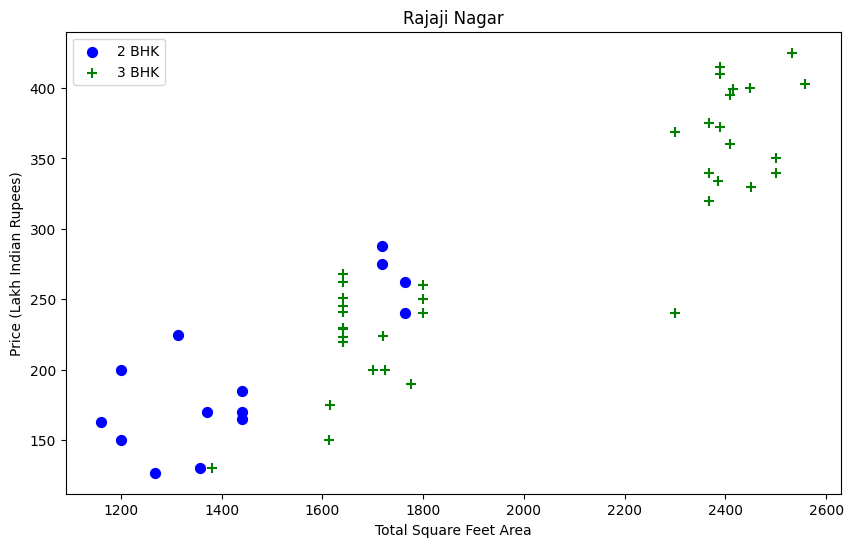

In [701]:
def plot_scatter_chart(df,location):
    BHK2 = df[(df.location==location) & (df.BHK==2)]
    BHK3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (10,6)
    plt.scatter(BHK2.total_sqft,BHK2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

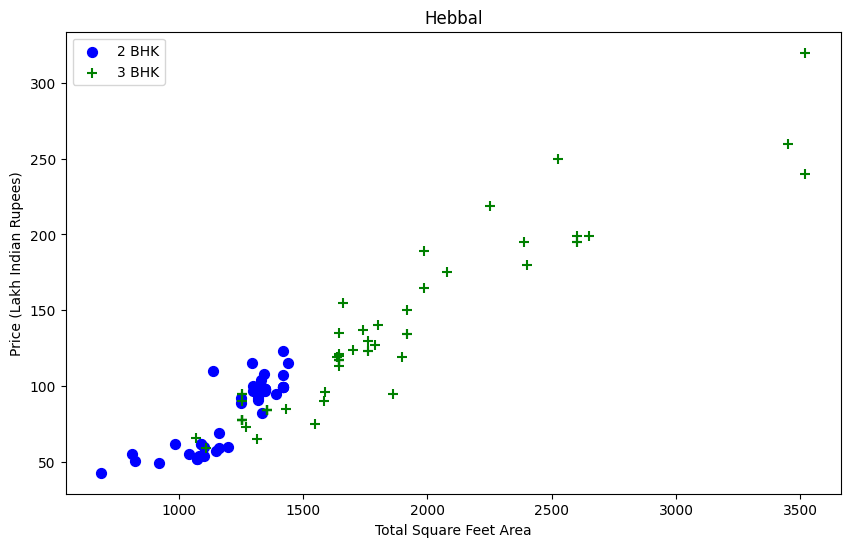

In [702]:
plot_scatter_chart(df6, 'Hebbal')

In [703]:
def remove_BHK_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        BHK_stats = {}
        for BHK, BHK_df in location_df.groupby('BHK'):
            BHK_stats[BHK] = {
                'mean': np.mean(BHK_df.price_per_sqft),
                'std': np.std(BHK_df.price_per_sqft),
                'count': BHK_df.shape[0]
            }
        for BHK, BHK_df in location_df.groupby('BHK'):
            stats = BHK_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df7 = remove_BHK_outliers(df6)
df7.shape

(7369, 7)

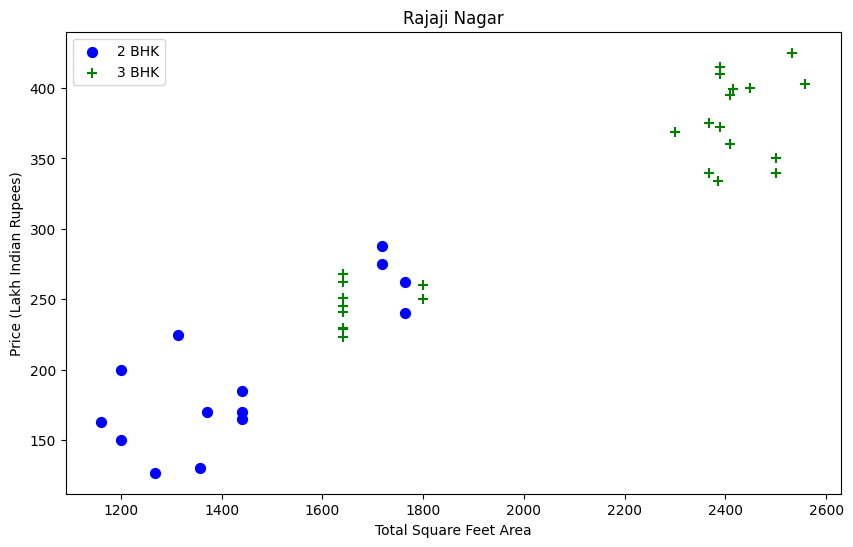

In [704]:
plot_scatter_chart(df7,"Rajaji Nagar")

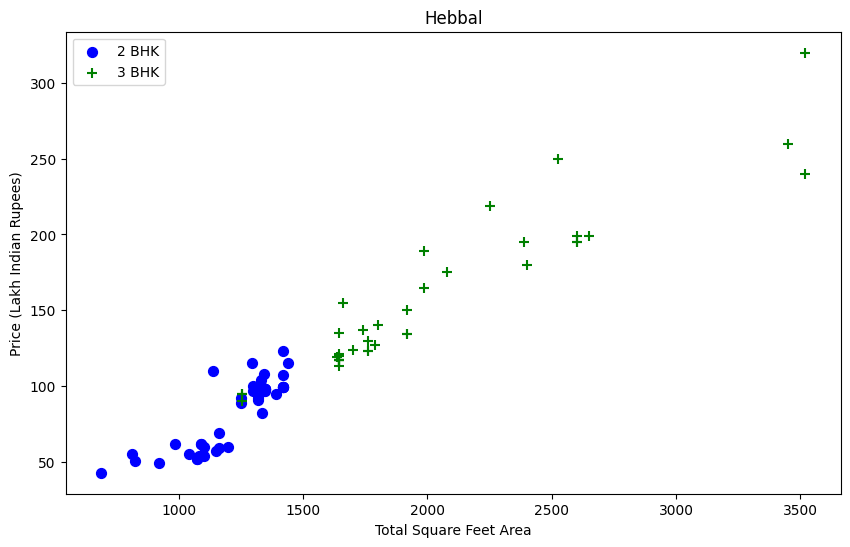

In [705]:
plot_scatter_chart(df7, 'Hebbal')

Text(0, 0.5, 'Count')

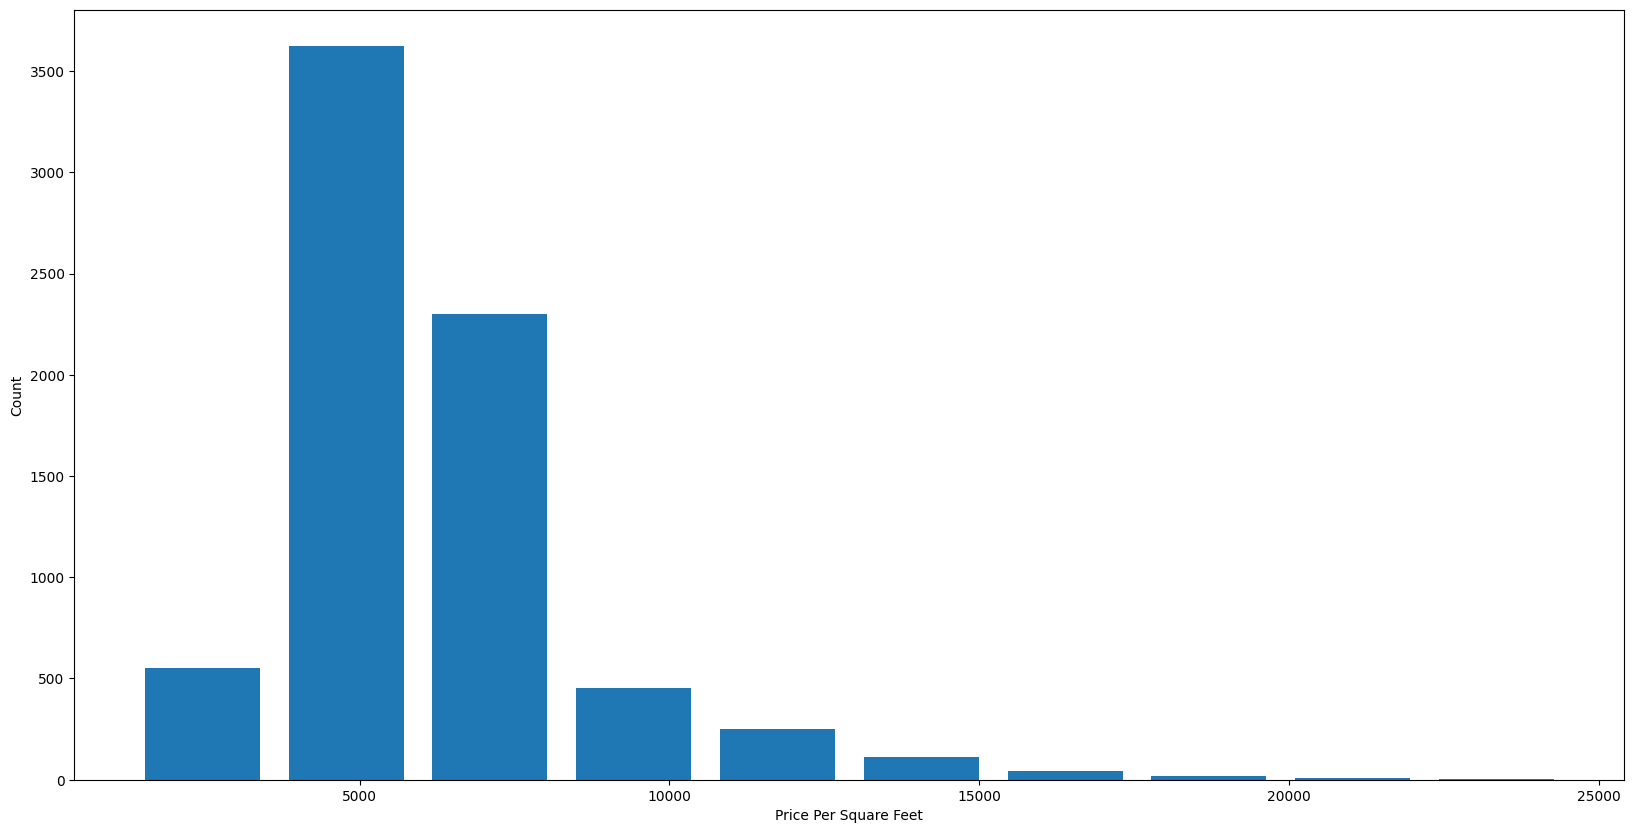

In [706]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [707]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [708]:
len(df7.bath.unique())

13

In [709]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5344,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8547,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8633,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9329,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9642,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

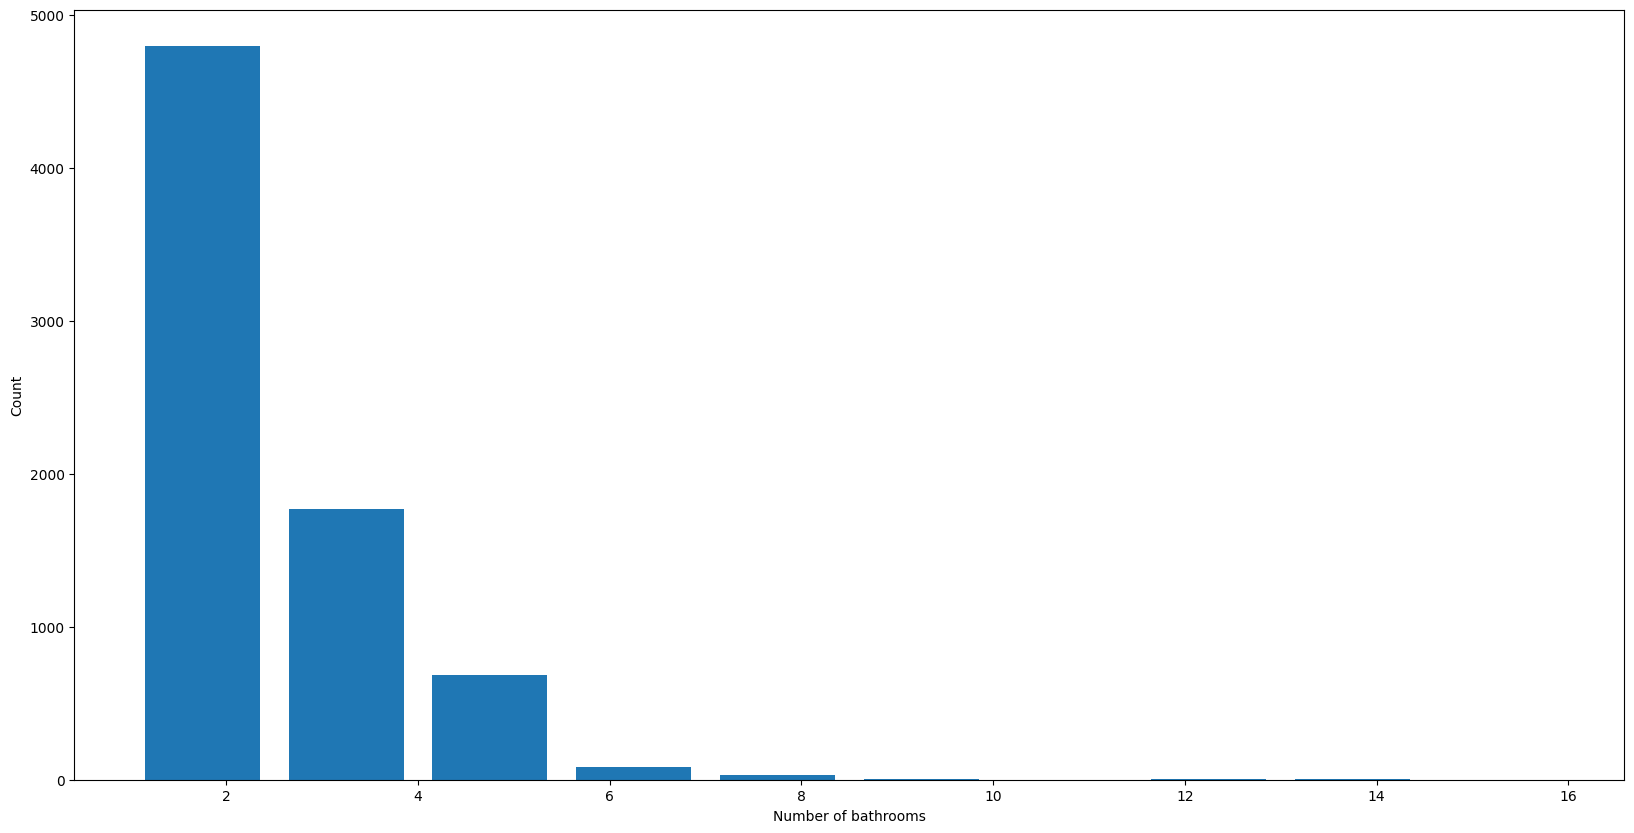

In [710]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

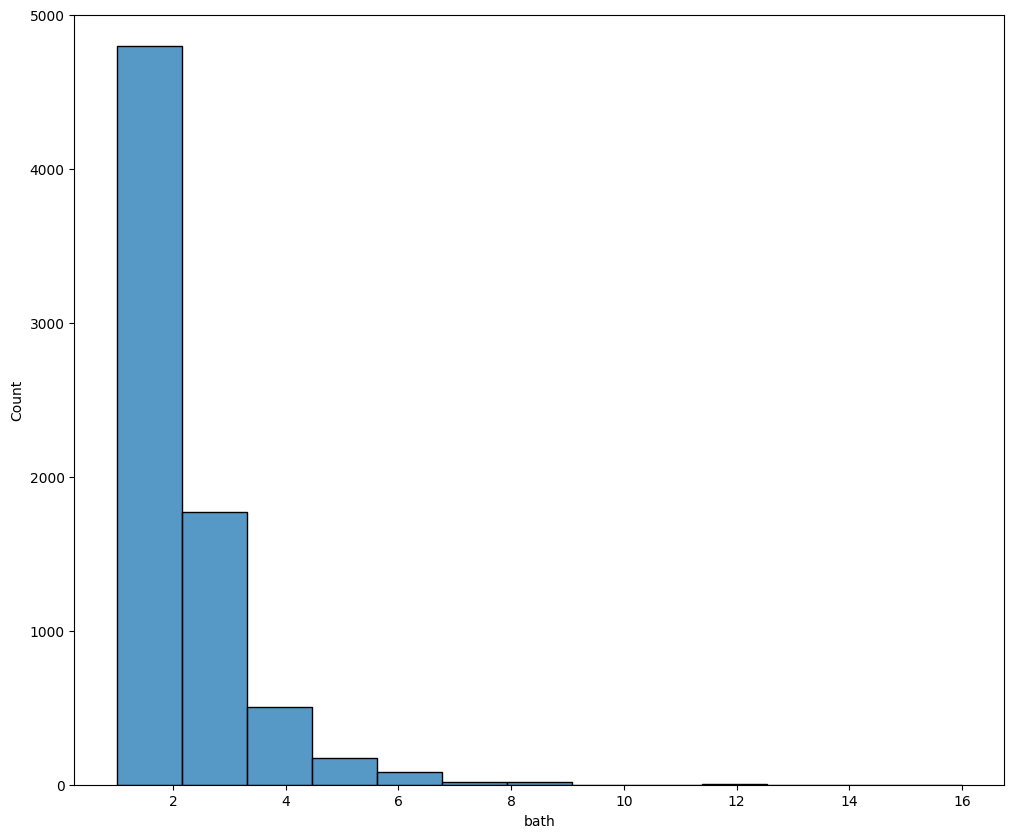

In [711]:
plt.figure(figsize=(12, 10))
sns.histplot(df7.bath, bins=13)
plt.ylim(0, 5000)
plt.show()

In [712]:
df7.shape

(7369, 7)

In [713]:
len(df7[df7.bath>df7.BHK+2])

5

In [714]:
df7[df7.bath<=df7.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10213,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10214,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10217,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10218,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [715]:
df8 = df7[df7.bath<=df7.BHK+2]
df8.shape

(7364, 7)

In [716]:
df8[df8.bath>df8.BHK]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
11,1st Block Koramangala,4 BHK,3000.0,5.0,500.0,4,16666.666667
15,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525
21,1st Phase JP Nagar,1 BHK,840.0,2.0,50.0,1,5952.380952
41,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.333333
42,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,18750.000000
...,...,...,...,...,...,...,...
10129,other,4 Bedroom,3100.0,5.0,425.0,4,13709.677419
10157,other,2 BHK,600.0,3.0,72.0,2,12000.000000
10184,other,4 BHK,6652.0,6.0,660.0,4,9921.828022
10191,other,4 Bedroom,6688.0,6.0,700.0,4,10466.507177


In [717]:
df9 = df8.drop(['size' , 'price_per_sqft'] , axis = 'columns')
df9.head()


,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [718]:
df9.shape

(7364, 5)

In [719]:
df9.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [720]:
## Onehot encode Location
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_loc=OneHotEncoder()
loc_encoder=onehot_encoder_loc.fit_transform(df9[['location']]).toarray()
loc_encoder

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [721]:
encoded_feature_names = onehot_encoder_loc.get_feature_names_out()

In [722]:
loc_encoded_df=pd.DataFrame(loc_encoder,columns=encoded_feature_names)
loc_encoded_df

,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [723]:
df10 = df9.drop(['location'] , axis = 'columns')

In [724]:
df10.isnull().sum()

total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [725]:
loc_encoded_df.isnull().sum()

location_1st Block Jayanagar          0
location_1st Block Koramangala        0
location_1st Phase JP Nagar           0
location_2nd Phase Judicial Layout    0
location_2nd Stage Nagarbhavi         0
                                     ..
location_Yelahanka                    0
location_Yelahanka New Town           0
location_Yelenahalli                  0
location_Yeshwanthpur                 0
location_other                        0
Length: 255, dtype: int64

In [726]:
# Reset indices before concatenation
df10.reset_index(drop=True, inplace=True)
loc_encoded_df.reset_index(drop=True, inplace=True)

In [727]:
## Combine one hot encoded df with the original df
df11 = pd.concat([df10, loc_encoded_df],axis=1)
df11.head()

,total_sqft,bath,price,BHK,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,428.0,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1630.0,3.0,194.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1875.0,2.0,235.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1200.0,2.0,130.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1235.0,2.0,148.0,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [728]:
df11.isnull()

,total_sqft,bath,price,BHK,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7359,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7360,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [729]:
df11.shape

(7364, 259)

In [730]:
import pickle
with open('onehot_encoder_loc.pkl','wb') as file:
    pickle.dump(onehot_encoder_loc,file)

In [732]:
df11.to_csv('model_trainer_bangalore.csv', index=False)